# Проект - Анализ продажи компьютерных игр интернет магазина.

### Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.
Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1- Откроем файл с данными и изучим его.

In [1]:
# загрузим необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [2]:
# загрузим файл в проект.
games = pd.read_csv('games.csv')


In [3]:
# Создадим функцию для отображения информации о датасете.
def review(df: pd.DataFrame, limit_na_category: int=10) -> None:
    '''Функция получения первичной информации о датафрейме'''
    print ('----- Случайные 5 строк -----')
    display(df.sample(5))
    print('')
    print('----- Информация по данным -----')
    df.info()
    print('')
    print ('----- Пропуски -----')
    count = 0
    shape_0 = df.shape[0]
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(f'{element} - {df[element].isna().sum()} пропусков {round(df[element].isna().sum() * 100 / shape_0,2)}% от числа строк.')
            count = +1
    if count == 0:
        print('Пропусков нет')
        print()
    print('----- Дубликаты -----')
    if df.duplicated().sum() > 0:
        print(f'Количество дубликатов: {df.duplicated().sum()}')
    else:
        print('Дубликатов нет')
    # ищем, есть ли категориальные столбцы (содержащие до limit_na_category уникальных значений) в датафрейме
    min_unique = limit_na_category + 1
    for element in df.columns:
        min_unique = min(min_unique, df[element].nunique())
        if min_unique <= limit_na_category:
            print()
    print('----- Категориальные признаки -----')
    for element in df.columns:
        if df[element].nunique() <= limit_na_category:
            print(f'{element}: {df[element].nunique()} категории- {df[element].unique()}')
    print()
    print('----- Статистика по данным -----')
    display(df.describe(include='all', datetime_is_numeric=True))
    print('----- Количество каждого значения для столбца -----')
    for element in df.columns:
        display(df[element].value_counts())


In [4]:
# посмотрим на данные
review(games)


----- Случайные 5 строк -----


Name Platform  \
1867                           Need for Speed: ProStreet      Wii   
16255  PC Engine Best Collention: Ginga Ojousama Dens...      PSP   
8653                                       Psychic Force       PS   
5872                                  Hard Hitter Tennis      PS2   
803                                       Sim Theme Park       PC   

       Year_of_Release      Genre  NA_sales  EU_sales  JP_sales  Other_sales  \
1867            2007.0     Racing      0.53      0.45      0.00         0.12   
16255           2008.0  Adventure      0.00      0.00      0.01         0.00   
8653            1996.0   Fighting      0.01      0.01      0.13         0.01   
5872            2001.0     Sports      0.15      0.11      0.00         0.04   
803             1998.0   Strategy      2.04      0.04      0.00         0.00   

       Critic_Score User_Score Rating  
1867           61.0        6.9   E10+  
16255           NaN        NaN    NaN  
8653            NaN        NaN    NaN  
5872            NaN        tbd      E  
803             NaN        8.3      E


----- Информация по данным -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

----- Пропуски -----
Name - 2 пропусков 0.01% от числа строк.
Year_of_Release - 269 пропусков 1.61% от числа строк.
Genre - 2 пропусков 0.01% от числа строк.
Critic_Score - 8578 пропусков 51.32% от числа ст

Name Platform  Year_of_Release   Genre  \
count                         16713    16715     16446.000000   16713   
unique                        11559       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      2006.484616     NaN   
std                             NaN      NaN         5.877050     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN   

            NA_sales      EU_sales      JP_sales   Other_sales  Critic_Score  \
count   16715.000000  16715.000000  16715.000000  16715.000000   8137.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.263377      0.145060      0.077617      0.047342     68.967679   
std         0.813604      0.503339      0.308853      0.186731     13.938165   
min         0.000000      0.000000      0.000000      0.000000     13.000000   
25%         0.000000      0.000000      0.000000      0.000000     60.000000   
50%         0.080000      0.020000      0.000000      0.010000     71.000000   
75%         0.240000      0.110000      0.040000      0.030000     79.000000   
max        41.360000     28.960000     10.220000     10.570000     98.000000   

       User_Score Rating  
count       10014   9949  
unique         96      8  
top           tbd      E  
freq         2424   3990  
mean          NaN    NaN  
std           NaN    NaN  
min           NaN    NaN  
25%           NaN    NaN  
50%           NaN    NaN  
75%           NaN    NaN  
max           NaN    NaN

----- Количество каждого значения для столбца -----


Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: NA_sales, Length: 402, dtype: int64

0.00     5870
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: EU_sales, Length: 307, dtype: int64

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: JP_sales, Length: 244, dtype: int64

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: Other_sales, Length: 155, dtype: int64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: Critic_Score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Датасет содержит 16715 строк и 11 столбцов, в некоторых из которых имеются пропуски. Столбцы имеют следующий формат: float64(6), object(5).

### Выводы.
Датасет содержит 16715 строк и 11 столбцов, в некоторых из которых имеются пропуски. Столбцы имеют следующий формат: float64(6), object(5).

Уже при поверхностном анализе видно, что в данных присутствует ряд проблем:

-- Названия столбцов не приведены к нижнему регистру;

-- Пропуски данных в столбцах;

-- Неправильные типы данных в ряде столбцов (Year_of_Release, User_Score).

Далее избавимся от этих проблем (там, где это возможно и целесообразно).


## Подготовка данных.

In [5]:
# приведем название столбцов к нижнему регистру.
games.columns = games.columns.str.lower()
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# изучим строки, в которых не заполнено поле name
display(games[games['name'].isna()])


name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [7]:
# всего две строки, их можно безболезненно удалить.
games.dropna(subset=['name'], inplace=True)
games['name'].isna().sum()


0

In [8]:
# посмотрим количество пропусков в столбце с годом выхода игр.
games['year_of_release'].isna().sum()


269

In [9]:
# удалим нулевые значения т.к. они составляют менее 2% от заполненных значений.
games.dropna(subset=['year_of_release'], inplace =True)

# поменяем тип в столбце год релиза на int.
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'].dtype


dtype('int32')

Решено пока не заполнять пропуски нигде, кроме столбца возрастного рейтинга. Пропуски по годам выпуска, названию  мы удалили, их очень мало. Пропуски в рейтингах критиков и игроков заполнять нельзя, т.к. любой метод заполнения исказит результаты корреляции и статистических тестов.


In [10]:
# смотрим столбец user_score.
games['user_score'].value_counts()


tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [11]:
# в столбце о рейтинге пользователей встречаются значения tbd ("to be defined"), вместо цифрового рейтинга. Это расшифровывается как "будет определено".
# эти записи нужно заменить на None, иначе не будет работать расчет корреляций. Любое заполнение пропусков здесь вредно т.к. любая числовая замена нарушит характер корреляционной зависимости между переменными.
# изучим эти записи.
display(games.query('user_score == "tbd"').head())


name platform  year_of_release   genre  \
119                   Zumba Fitness      Wii             2010  Sports   
301  Namco Museum: 50th Anniversary      PS2             2005    Misc   
520                 Zumba Fitness 2      Wii             2011  Sports   
645                    uDraw Studio      Wii             2010    Misc   
718                 Just Dance Kids      Wii             2010    Misc   

     na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
119      3.45      2.59       0.0         0.66           NaN        tbd      E  
301      2.08      1.35       0.0         0.54          61.0        tbd   E10+  
520      1.51      1.03       0.0         0.27           NaN        tbd      T  
645      1.65      0.57       0.0         0.20          71.0        tbd      E  
718      1.52      0.54       0.0         0.18           NaN        tbd      E

In [12]:
# значения tbd скорее всего указывают на незаполненность этих полей.
# заменим "tbd" на NaN
games['user_score'].replace('tbd', np.NaN, inplace=True)
games['user_score'].value_counts()


7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [13]:
# приведем user_score к числовому типу
games['user_score'] = pd.to_numeric(games['user_score'])

# проверим.
games['user_score'].dtype

dtype('float64')

In [14]:
# заменим отсутствующие значения в столбцах на "заглушку" в виде -1.
games.fillna({'critic_score': -1, 'user_score': -1, 'rating': '-1'}, inplace=True)



In [15]:
# суммарное количество пропусков
games.isna().sum().sort_values()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [16]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

# проверим результат.
games.columns.values.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating',
 'total_sales']

In [17]:
games.head()


name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77          -1.0        -1.0     -1   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00          -1.0        -1.0     -1   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [18]:
# Посмотрим, что у нас осталось.
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(f'{col_l}: количество NaN, {temp[col_l].isna().sum()} процент NaN {round(temp[col_l].isna().sum()/len(temp)*100, 2)}%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Вывод
В результате этих шагов были изучены значения в датасете. Удалено все, что было лишним в столбцах 'name', 'year_of_release', влияния на анализ данных это не окажет.

Значения в столбце 'year_of_release' переведены в Int, так как в качестве datetime в проекте он нам не понадобится.

Значения в 'user_score' приведены к float64.

Мы полностью избавились от пропусков в наиболее важных столбцах: название игры, год релиза.

Пропуски в рейтингах критиков и игроков заполнять нельзя, т.к. любой метод заполнения исказит результаты корреляции и статистических тестов.

В столбце рейтинга пользователей встречаются значения tbd вместо цифрового рейтинга. Эти значения нужно заменить на None, иначе не будет работать расчет корреляций.

В столбцах 'critic_score', 'user_score', 'rating' - вместо нулевых значений поставили "заглушку" -1.

Посчитали суммарные продажи во всех регионах и записали в отдельный столбец 'total_sales'.


## исследовательский анализ данных


Подсчитаем количество уникальных значений в столбцах, в этом подсчете исключаются значения с NaN.

Мы посмотрим, сколько игр выпускалось в разные годы. Дело в том, что платформ для игр в разные годы было много, а одна и таже игра могла выпускаться не для одной платформы.

Было принято решение: если одна и таже игра одновременно выпускалась не для одной платформы, учитывать ее один раз.


In [19]:
# построим таблицу и график количества выпускаемых игр по годам.
games_by_year = games.groupby('year_of_release').agg({'name': 'nunique'})
display(games_by_year)


name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               40
1992               41
1993               59
1994              117
1995              215
1996              258
1997              282
1998              364
1999              326
2000              325
2001              428
2002              631
2003              546
2004              550
2005              657
2006              773
2007              884
2008             1039
2009             1001
2010              900
2011              779
2012              446
2013              335
2014              319
2015              362
2016              297

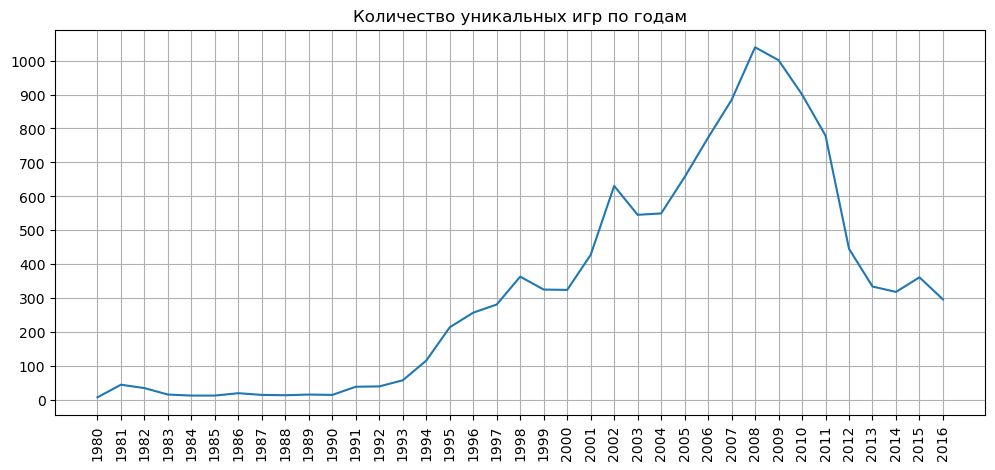

In [20]:
# строим график.
plt.figure(figsize = (12 ,5))
plt.plot(games_by_year['name'])
plt.yticks(np.arange(0, 1100, step=100))
plt.xticks(games['year_of_release'].unique(), rotation = 90)
plt.title('Количество уникальных игр по годам')
plt.grid()
plt.show()


### Вывод
Как видно, индустрия компьютерных игр стремительно развивалась до 2008 года. Однако, после количество выпускаемых игр стало уменьшаться.
Возможно в этот период началось развитие игр для смартфонов.
При составлении прогноза на 2017 г. можно выбрать период 2013-2015 гг.
Однако при выборе периода для анализа также стоит учесть распределение продаж по платформам.


In [21]:
# сгруппируем суммарные продажи по платформам
total_sales_by_platform = games.groupby('platform').agg({'total_sales': 'sum'})
print(total_sales_by_platform.sort_values(by='total_sales', ascending=False))


          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


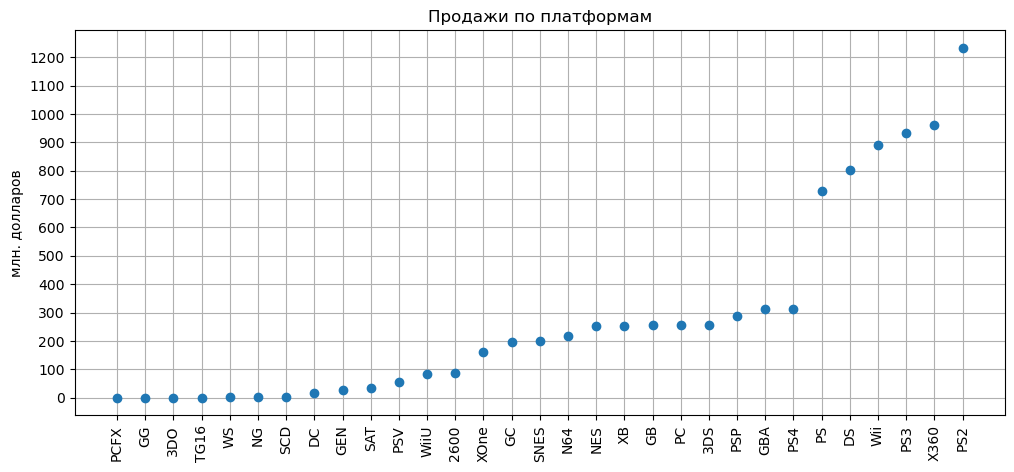

In [22]:
# график продаж по платформам.
plt.figure(figsize = (12 ,5))
plt.plot(total_sales_by_platform['total_sales'].sort_values(), 'o')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 1300, step=100))
plt.title('Продажи по платформам')
plt.ylabel('млн. долларов')
plt.grid()
plt.show()


 как видно из таблицы, продажи можно разделить на следующие части:
1.- от 0 до 150 млн долларов;
2.- от 150 до 350 млн долларов;
3.- от 700 и выше.
П.С.- можно разбить еще на более мелкие категории, но мы делать здесь этого не будем.
Построим распределение продаж по годам для платформ с наибольшими продажами (от 700 млн. долларов и выше).


In [23]:
# Выберем платформы, где продажи составили 700 млн. долларов и выше.
top_platforms = total_sales_by_platform.query('total_sales > 700').sort_values(by='total_sales', ascending=False).index
print('Список индексов платформ:', top_platforms)


Список индексов платформ: Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


In [24]:
# Сгруппируем суммарные продажи по платформе и году
sales_by_platform_and_year = games.groupby(['platform', 'year_of_release'], as_index=False).agg({'total_sales': 'sum'})
display(sales_by_platform_and_year.query('platform in @top_platforms').head())


platform  year_of_release  total_sales
25       DS             1985         0.02
26       DS             2004        17.27
27       DS             2005       130.14
28       DS             2006       119.81
29       DS             2007       146.94

In [25]:
# построим таблицу и heatmap продаж игр для топовых платформ по годам.
pd.set_option('display.max_columns', None)
top_platforms_pivot = sales_by_platform_and_year.query('platform in @top_platforms').pivot("platform", "year_of_release", "total_sales")
display(top_platforms_pivot)


year_of_release  1985  1994   1995  1996    1997    1998    1999   2000  \
platform                                                                  
DS               0.02   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
PS                NaN  6.03  35.96  94.7  136.17  169.49  144.53  96.37   
PS2               NaN   NaN    NaN   NaN     NaN     NaN     NaN  39.17   
PS3               NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
Wii               NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
X360              NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   

year_of_release    2001    2002    2003    2004    2005    2006    2007  \
platform                                                                  
DS                  NaN     NaN     NaN   17.27  130.14  119.81  146.94   
PS                35.59    6.67    2.07     NaN     NaN     NaN     NaN   
PS2              166.43  205.38  184.31  211.81  160.66  103.42   75.99   
PS3                 NaN     NaN     NaN     NaN     NaN   20.96   73.19   
Wii                 NaN     NaN     NaN     NaN     NaN  137.15  152.77   
X360                NaN     NaN     NaN     NaN    8.25   51.62   95.41   

year_of_release    2008    2009    2010    2011    2012    2013   2014   2015  \
platform                                                                        
DS               145.31  119.54   85.02   26.18   11.01    1.54    NaN    NaN   
PS                  NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN   
PS2               53.90   26.40    5.64    0.45     NaN     NaN    NaN    NaN   
PS3              118.52  130.93  142.17  156.78  107.36  113.25  47.76  16.82   
Wii              171.32  206.97  127.95   59.65   21.71    8.59   3.75   1.14   
X360             135.26  120.29  170.03  143.84   99.74   88.58  34.74  11.96   

year_of_release  2016  
platform               
DS                NaN  
PS                NaN  
PS2               NaN  
PS3              3.60  
Wii              0.18  
X360             1.52

In [26]:
# данные для платформы "DS" содержит странный артефакт в 1985 году. Учитывая, что платформа DS была представлена только в 2004 году, данные за 1985 год явно ошибочны. Проверим их.
display(games.query('platform == "DS" and year_of_release == 1985'))


name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0          -1.0        -1.0   

      rating  total_sales  
15957     -1         0.02

In [27]:
# по данным с сайта производителя игры она была выпущена на рынок только в 2007 г. Так, что заменим соответствующие значения и все еще раз проверим.
# Исправим year_of_release для Strongest Tokyo University Shogi
games.loc[15957, 'year_of_release'] = 2007
sales_by_platform_and_year = games.groupby(['platform', 'year_of_release'], as_index=False).agg({'total_sales': 'sum'})
top_platforms_pivot = sales_by_platform_and_year.query('platform in @top_platforms').pivot("platform", "year_of_release", "total_sales")
display(top_platforms_pivot)


year_of_release  1994   1995  1996    1997    1998    1999   2000    2001  \
platform                                                                    
DS                NaN    NaN   NaN     NaN     NaN     NaN    NaN     NaN   
PS               6.03  35.96  94.7  136.17  169.49  144.53  96.37   35.59   
PS2               NaN    NaN   NaN     NaN     NaN     NaN  39.17  166.43   
PS3               NaN    NaN   NaN     NaN     NaN     NaN    NaN     NaN   
Wii               NaN    NaN   NaN     NaN     NaN     NaN    NaN     NaN   
X360              NaN    NaN   NaN     NaN     NaN     NaN    NaN     NaN   

year_of_release    2002    2003    2004    2005    2006    2007    2008  \
platform                                                                  
DS                  NaN     NaN   17.27  130.14  119.81  146.96  145.31   
PS                 6.67    2.07     NaN     NaN     NaN     NaN     NaN   
PS2              205.38  184.31  211.81  160.66  103.42   75.99   53.90   
PS3                 NaN     NaN     NaN     NaN   20.96   73.19  118.52   
Wii                 NaN     NaN     NaN     NaN  137.15  152.77  171.32   
X360                NaN     NaN     NaN    8.25   51.62   95.41  135.26   

year_of_release    2009    2010    2011    2012    2013   2014   2015  2016  
platform                                                                     
DS               119.54   85.02   26.18   11.01    1.54    NaN    NaN   NaN  
PS                  NaN     NaN     NaN     NaN     NaN    NaN    NaN   NaN  
PS2               26.40    5.64    0.45     NaN     NaN    NaN    NaN   NaN  
PS3              130.93  142.17  156.78  107.36  113.25  47.76  16.82  3.60  
Wii              206.97  127.95   59.65   21.71    8.59   3.75   1.14  0.18  
X360             120.29  170.03  143.84   99.74   88.58  34.74  11.96  1.52

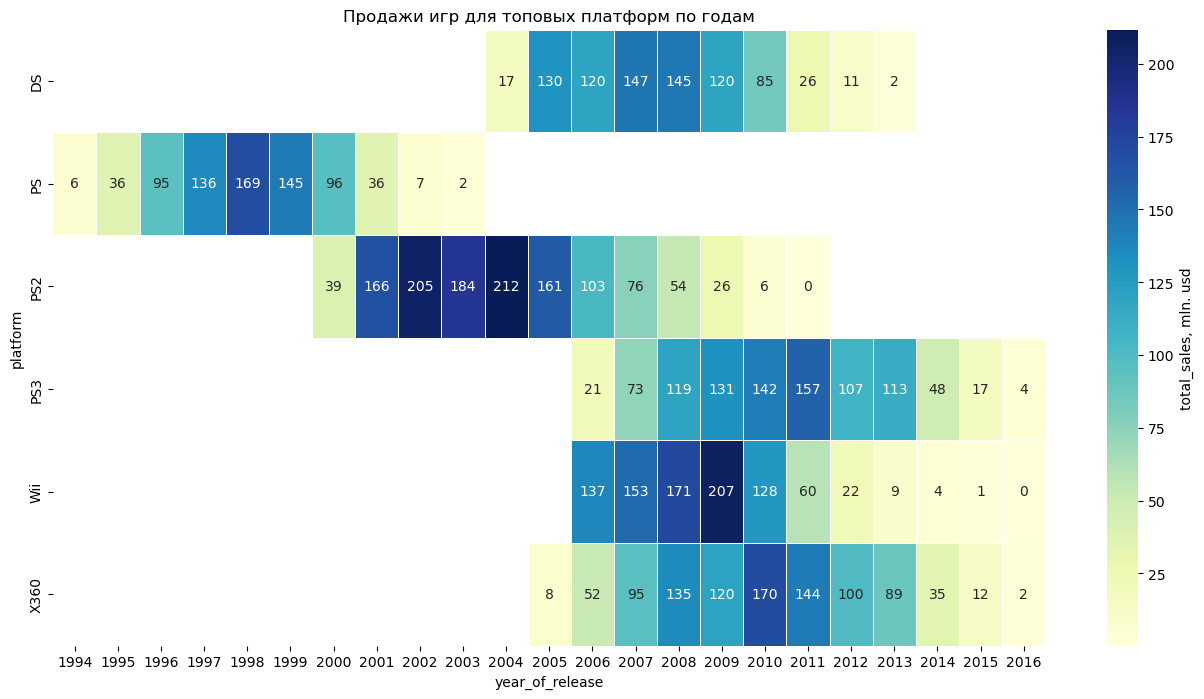

In [28]:
# построим heatmap.
def heatmap_platform_sales_by_year(heat_pivot, title):
    fig = plt.figure(figsize = (16, 8))
    ax = sns.heatmap(heat_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5,cbar_kws={'label': 'total_sales, mln. usd'})
    ax.set_title(title)

heatmap_platform_sales_by_year(top_platforms_pivot, title = 'Продажи игр для топовых платформ по годам')


Судя по данным из вышеприведенной таблице, жизненный цикл игры составляет от 6 до 10 лет, хотя как всегда есть и долгожители.
Для прогноза на 2017 г., как мы отмечали ранее, актуально использовать данные за 2013-2016 гг.
С точки зрения прогноза на 2017 г., целесообразно рассматривать 2013 г., т.к. в 2012 г. основные популярные платформы или закончили жизненный цикл или прошли пик продаж.


### Выбор актуального периода


In [29]:
# Создадим датафрейм с данными за актуальный период
actual_games = games.query('year_of_release >=2013')
display(actual_games.head(10))


name platform  year_of_release  \
16                         Grand Theft Auto V      PS3             2013   
23                         Grand Theft Auto V     X360             2013   
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
60                       Call of Duty: Ghosts     X360             2013   
69                       Call of Duty: Ghosts      PS3             2013   
72                                  Minecraft     X360             2013   
77                                    FIFA 16      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16        Action      7.02      9.09      0.98         3.96          97.0   
23        Action      9.66      5.14      0.06         1.41          97.0   
31       Shooter      6.03      5.86      0.36         2.38          -1.0   
33  Role-Playing      5.28      4.19      4.35         0.78          -1.0   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74          -1.0   
60       Shooter      6.73      2.56      0.04         0.91          73.0   
69       Shooter      4.10      3.63      0.38         1.25          71.0   
72          Misc      5.70      2.65      0.02         0.81          -1.0   
77        Sports      1.12      6.12      0.06         1.28          82.0   

    user_score rating  total_sales  
16         8.2      M        21.05  
23         8.1      M        16.27  
31        -1.0     -1        14.63  
33        -1.0     -1        14.60  
42         8.3      M        12.62  
47        -1.0     -1        11.68  
60         2.6      M        10.24  
69         2.6      M         9.36  
72        -1.0     -1         9.18  
77         4.3      E         8.58

In [30]:
# Определение потенциально выгодных платформ
# Сгруппируем суммарные продажи за актуальный период по платформе и году
platform_by_actual_year_pivot = actual_games.groupby(['platform', 'year_of_release'], as_index=False).agg({'total_sales': 'sum'}).pivot("platform", "year_of_release", "total_sales")
display(platform_by_actual_year_pivot)


year_of_release    2013    2014    2015   2016
platform                                      
3DS               56.57   43.76   27.78  15.14
DS                 1.54     NaN     NaN    NaN
PC                12.38   13.28    8.52   5.25
PS3              113.25   47.76   16.82   3.60
PS4               25.99  100.00  118.90  69.25
PSP                3.14    0.24    0.12    NaN
PSV               10.59   11.90    6.25   4.25
Wii                8.59    3.75    1.14   0.18
WiiU              21.65   22.03   16.35   4.60
X360              88.58   34.74   11.96   1.52
XOne              18.96   54.07   60.14  26.15

### выводы.
Видя тенденции в таблице и предполагая, что 2017 г. будет похож на 2013 г., основные продажи, как и в 2016 году, придутся на PS4 (Sony) и XOne (Microsoft). Данные платформы можно считать потенциально наиболее выгодными в 2017 году.


### Какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.


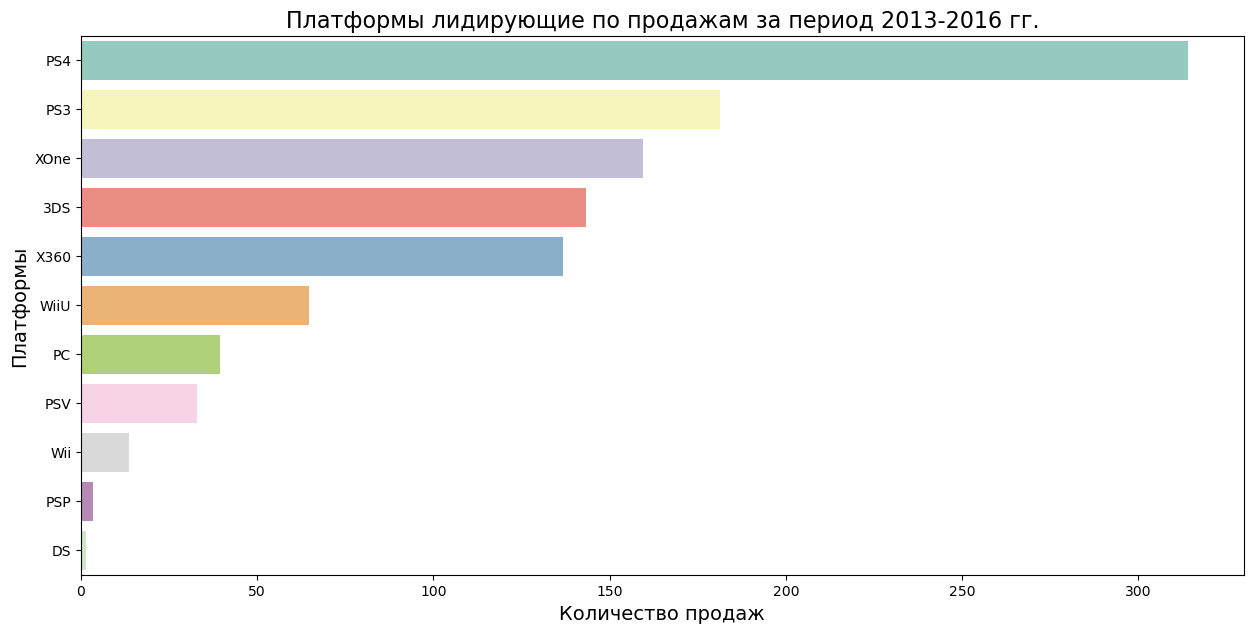

total_sales
platform             
PS4            314.14
PS3            181.43
XOne           159.32
3DS            143.25
X360           136.80

In [31]:
# Какие платформы лидируют по продажам за период 2013-2016 гг.
platforms_leader_sales = actual_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

# построим график
plt.figure(figsize=(15,7))
sns.barplot(y=platforms_leader_sales.index, x=platforms_leader_sales['total_sales'], palette='Set3')
plt.title('Платформы лидирующие по продажам за период 2013-2016 гг.', fontsize=16)
plt.ylabel('Платформы', size=14)
plt.xlabel('Количество продаж', size=14)
plt.show()

platforms_leader_sales.head()


### Вывод
К лидерам по продажам, за актуальный период 2013-2016 гг. относятся: PS4, PS3, XOne, 3DS и X360.

Потенциально прибыльные и растущие платформы за период 2013-2016 гг.: PS4, PS3, XONE, 3DS, X360.


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


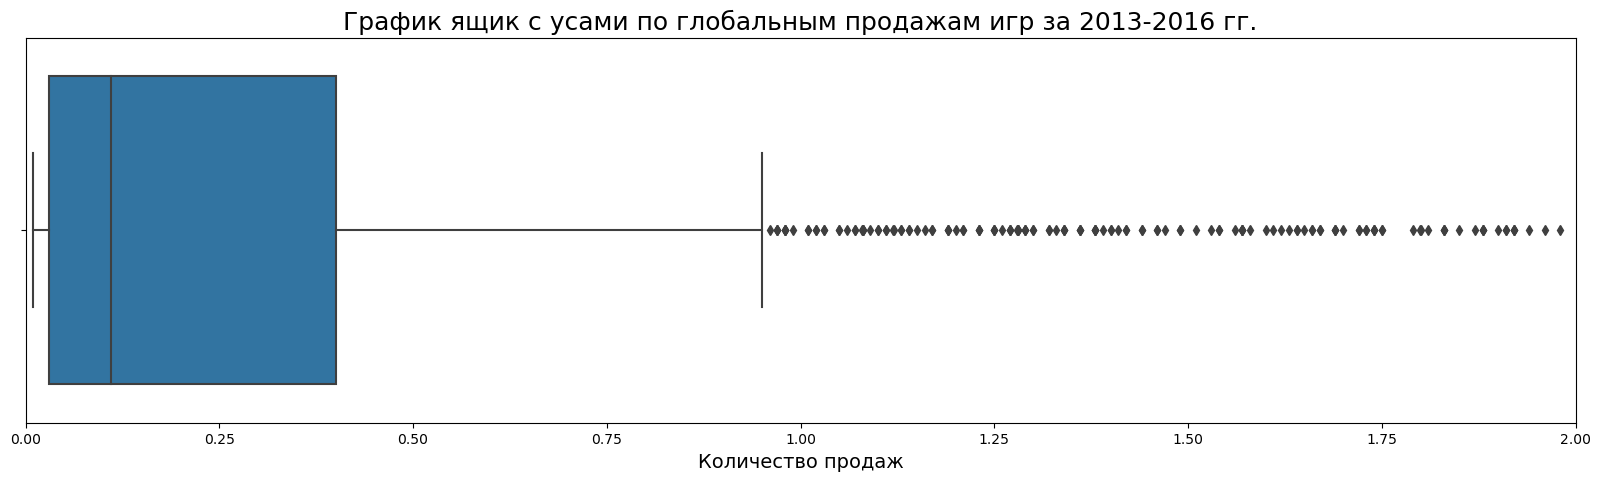

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

In [32]:
# Построим график «ящик с усами» по глобальным продажам всех игр.
plt.figure(figsize=(20,5))
sns.boxplot(data=actual_games, x='total_sales')
plt.title('График ящик с усами по глобальным продажам игр за 2013-2016 гг.', fontsize=18)
plt.xlim(0,2)
plt.xlabel('Количество продаж', size=14)
plt.show()

actual_games['total_sales'].describe()


### Вывод
В среднем количество проданных игр составляет 490000 копий. Медиана - 110000 копий. Возможно в наборе данных есть выбросы, так как стандартное отклонение больше среднего значения, оно составляет 1.24 млн проданных копий.


<Figure size 2000x1000 with 0 Axes>

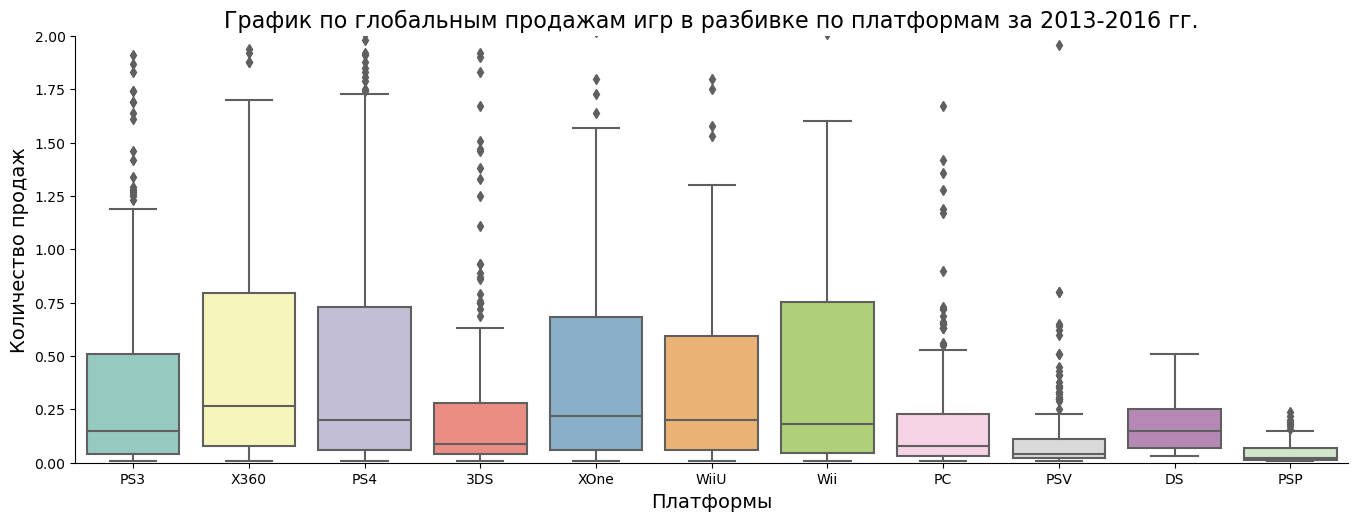

In [33]:
# Построим график ящик с усами по глобальным продажам игр в разбивке по платформам за 2013-2016 гг.
plt.figure(figsize=(20,10))
sns.catplot(kind='box', data=actual_games, x='platform', y='total_sales', orient='v', height=5, aspect=2.7, palette='Set3')
plt.xlabel('Платформы', size=14)
plt.ylabel('Количество продаж', size=14)
plt.ylim(0,2)
plt.title('График по глобальным продажам игр в разбивке по платформам за 2013-2016 гг.', fontsize=16)
plt.show()


### Анализ влияния отзывов на продажи


Проанализируем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве платформы для анализа выберем PS4.


----------
user_score
----------
PS4: коэффициент корреляции между user_score и продажами игры составляет 0.12
PS3: коэффициент корреляции между user_score и продажами игры составляет 0.21
XOne: коэффициент корреляции между user_score и продажами игры составляет 0.12
3DS: коэффициент корреляции между user_score и продажами игры составляет 0.05
X360: коэффициент корреляции между user_score и продажами игры составляет 0.07
WiiU: коэффициент корреляции между user_score и продажами игры составляет 0.24

----------
critic_score
----------
PS4: коэффициент корреляции между critic_score и продажами игры составляет 0.23
PS3: коэффициент корреляции между critic_score и продажами игры составляет 0.28
XOne: коэффициент корреляции между critic_score и продажами игры составляет 0.27
3DS: коэффициент корреляции между critic_score и продажами игры составляет 0.06
X360: коэффициент корреляции между critic_score и продажами игры составляет 0.25
WiiU: коэффициент корреляции между critic_score и продажам

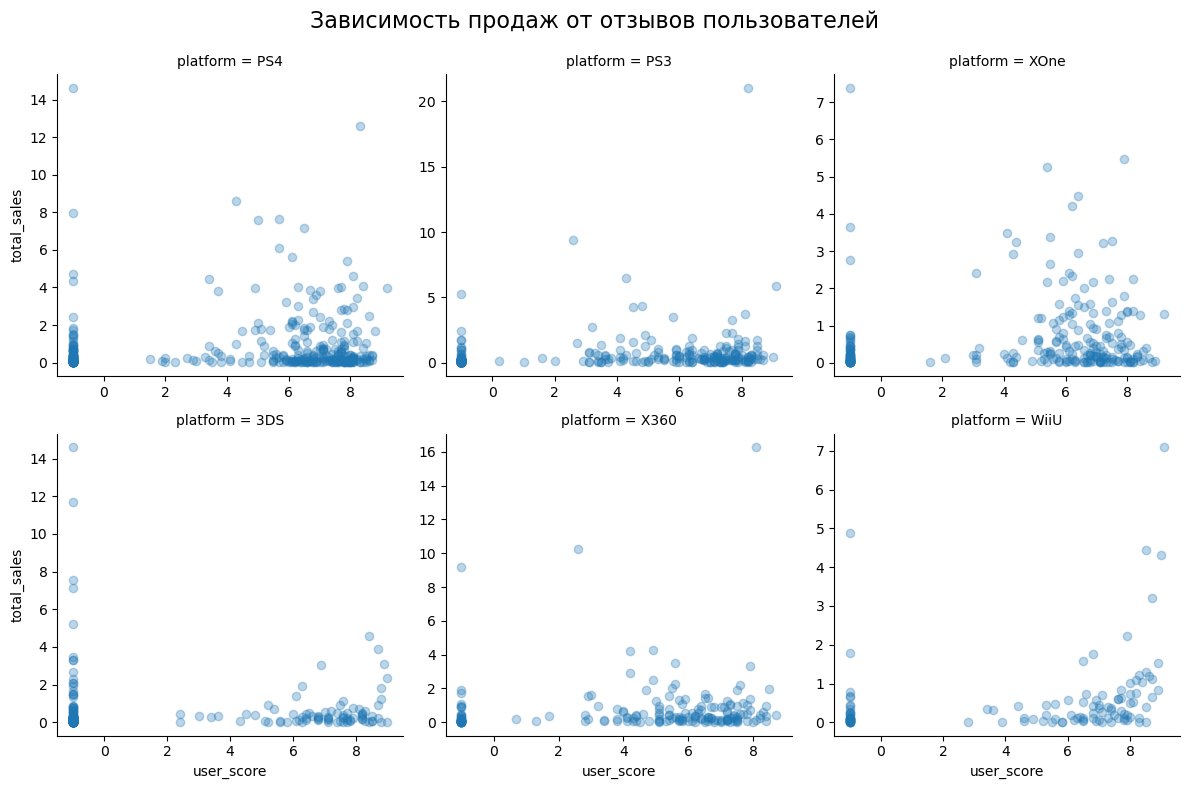

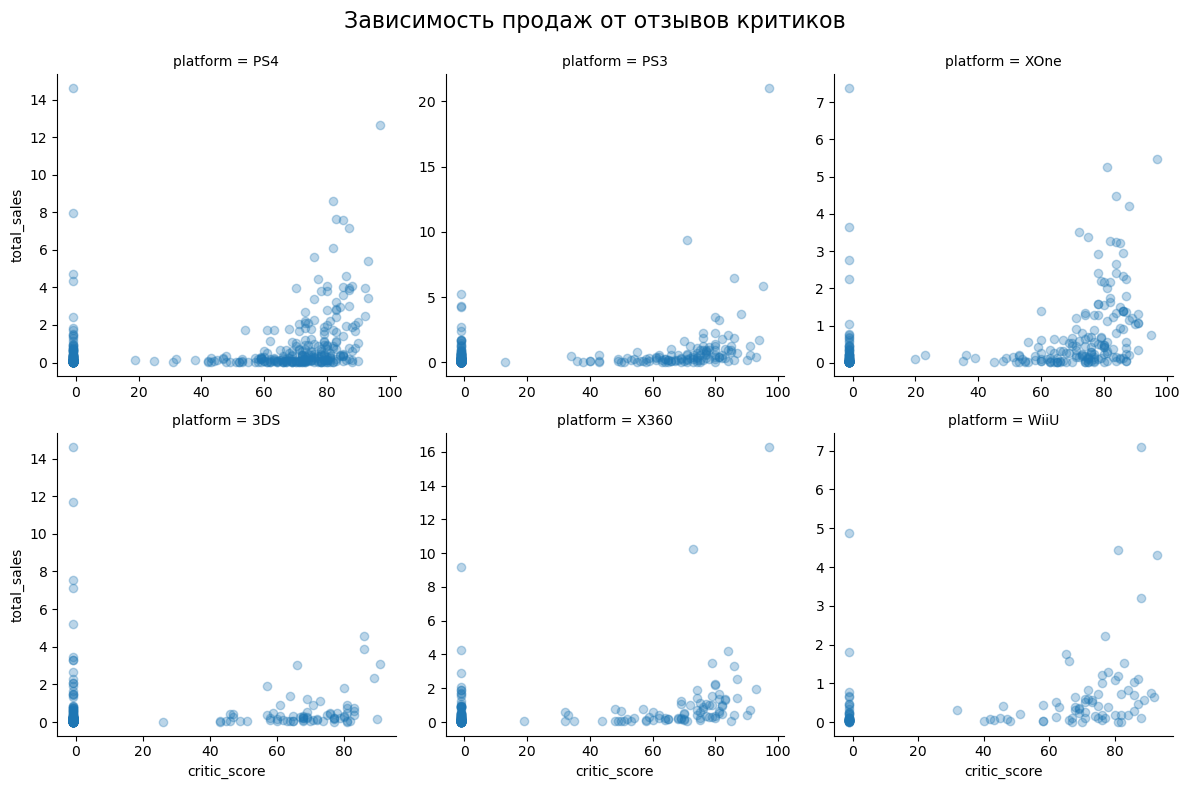

In [34]:
# Выберем 6 наиболее популярных платформ за актуальный период
top6_actual_platforms = actual_games.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(6).index

# Функция для расчета корреляции и построения графиков зависимости между оценками игры и ее продажами
def sales_to_score_plots_and_coreletion(which_score, title):
    g = sns.FacetGrid(actual_games.query('platform in @top6_actual_platforms'),col='platform', col_wrap=3, sharex=False, sharey=False, height=4, col_order=top6_actual_platforms)
    g.fig.suptitle(title, size=16)
    g.map(plt.scatter, which_score, 'total_sales', alpha=0.3)
    g.fig.subplots_adjust(top=.9)
    # Посчитаем корреляцию (Коэффициент Пирсона) между оценками игры и продажами
    print('----------')
    print(which_score)
    print('----------')
    for platform in top6_actual_platforms:
        platform_data = actual_games.query('platform == @platform')
        print(platform + ': коэффициент корреляции между {} и продажами игры составляет {:.2f}'.format(which_score, platform_data[which_score].corr(platform_data['total_sales'])))
    print()
    
sales_to_score_plots_and_coreletion('user_score', 'Зависимость продаж от отзывов пользователей')
sales_to_score_plots_and_coreletion('critic_score', 'Зависимость продаж от отзывов критиков')



### Вывод
Для игр всех популярных платформ присутствует слабая положительная корреляция между продажами игры и отзывами критиков. Таким образом, положительные отзывы критиков влияют на успешность продаж игры. Однако данное влияние не очень сильное.
В то же время, корреляция между продажами игр и отзывами пользователей наблюдается только для платформ Nintendo (3DS и WiiU), для которых положительные отзывы критиков влияют на успешность продаж игры.


### Анализ распределения игр по жанрам


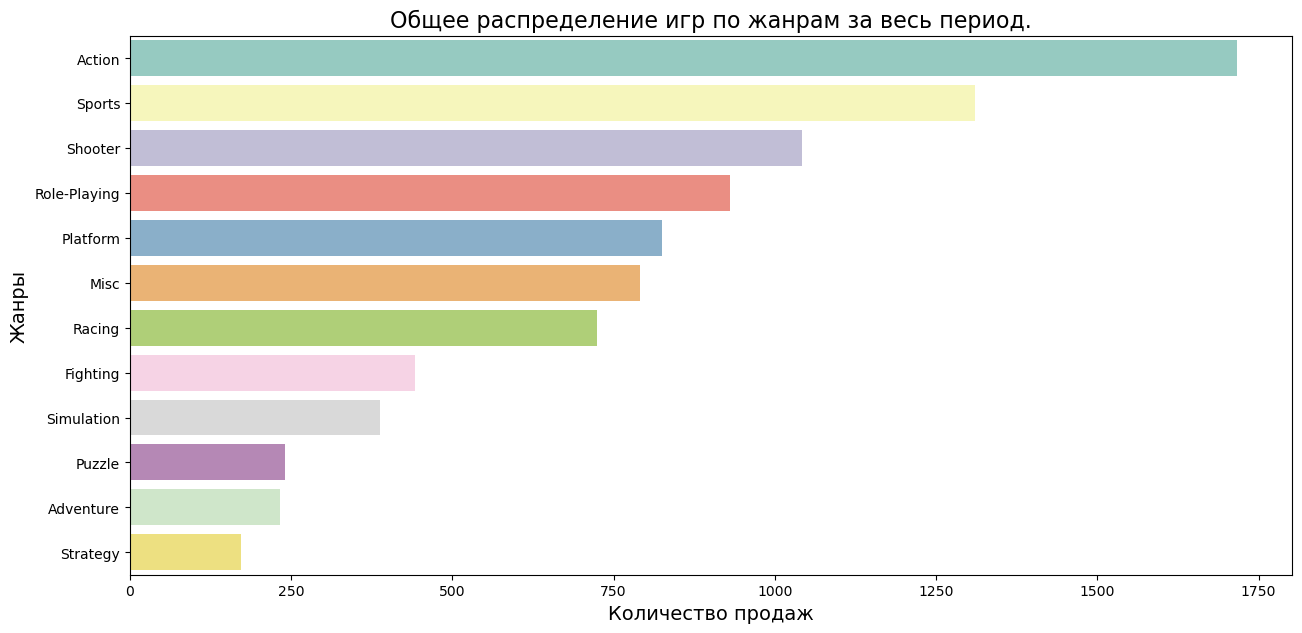

              total_sales
genre                    
Action            1716.52
Sports            1309.67
Shooter           1041.36
Role-Playing       931.08
Platform           825.55
Misc               790.29
Racing             723.49
Fighting           442.66
Simulation         387.96
Puzzle             239.89
Adventure          233.33
Strategy           172.57


In [35]:
# Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
# Распределение игр по жанрам за весь период.
genre_sales = games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).query('genre != "unknown"') 

# построим график
plt.figure(figsize=(15,7))
sns.barplot(y=genre_sales.index, x=genre_sales['total_sales'], palette='Set3')
plt.title('Общее распределение игр по жанрам за весь период.', fontsize=16)
plt.ylabel('Жанры', size=14)
plt.xlabel('Количество продаж', size=14)
plt.show()

print(genre_sales)


### Вывод
По полученным результатам таблицы видно, что лидеры продаж игры, жанр которых 'Action', за ним идут жанры 'Sports', 'Shooter'. Скорее всего, игры с этими жанрами больше всех вызывают самые яркие эмоции у пользователей.
Замыкают список жанры: 'Puzzle', 'Adventure', 'Strategy'.


## Шаг 4. Составление портрета типичного пользователя для каждого региона
Для каждого региона (Северная Америка, Европа, Япония) определим: Самые популярные платформы (топ-5); Самые популярные жанры (топ-5); Продажи в зависимости от рейтинга ESRB.


### Самые популярные платформы (топ-5).
Опишем различия в долях продаж за актуальный период.


na_sales  ratio
platform                 
PS4         108.74  24.8%
XOne         93.12  21.3%
X360         81.66  18.7%
PS3          63.50  14.5%
3DS          38.20   8.7%

eu_sales  ratio
platform                 
PS4         141.09  36.0%
PS3          67.81  17.3%
XOne         51.59  13.2%
X360         42.52  10.8%
3DS          30.96   7.9%

jp_sales  ratio
platform                 
3DS          67.81  48.2%
PS3          23.35  16.6%
PSV          18.59  13.2%
PS4          15.96  11.3%
WiiU         10.88   7.7%

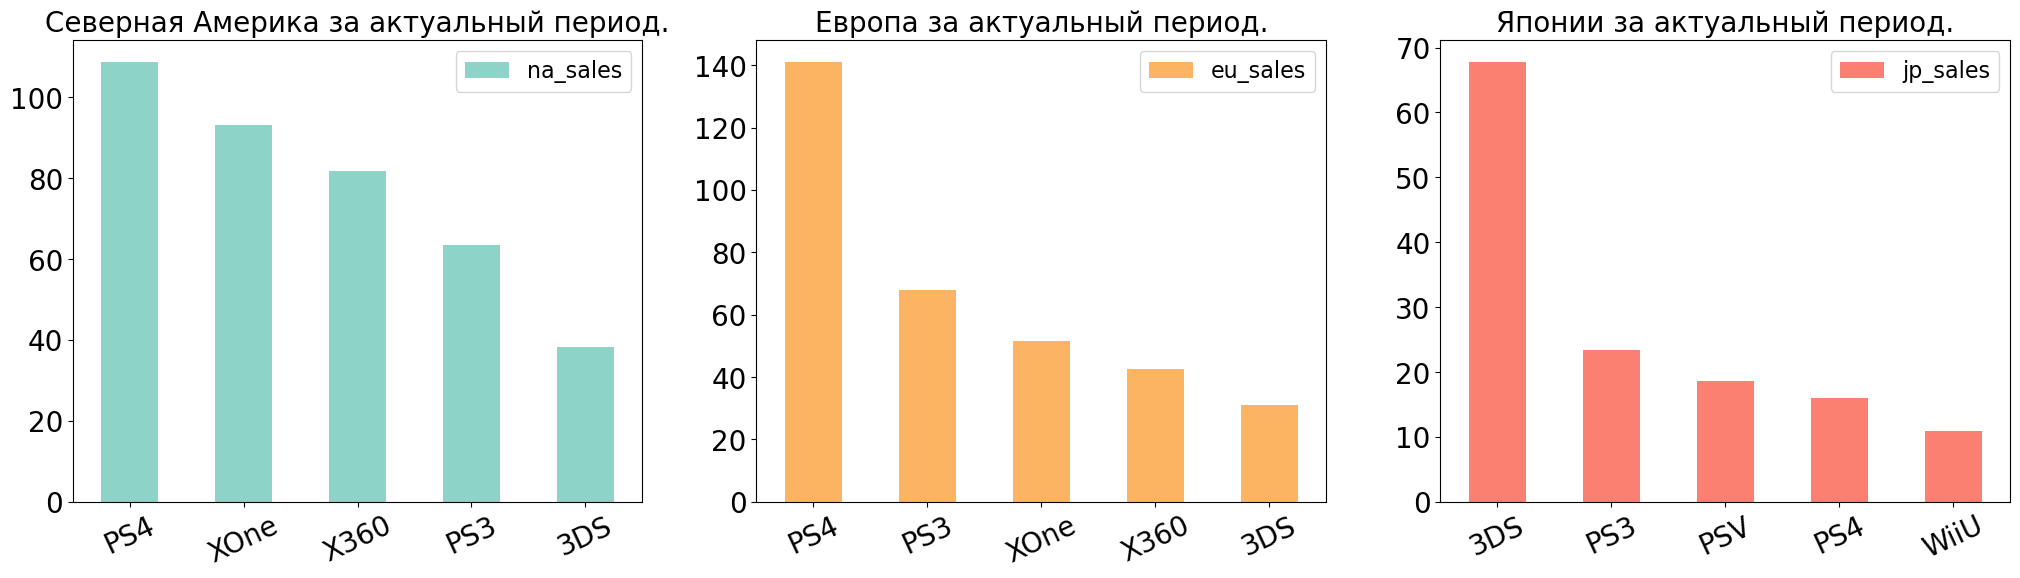

In [36]:
# Напишем функцию для автоматического построения графиков с заявленными параметрами.
def user_of_each_actual_region_plot(groupby, region_sales, ax):
    grouped = actual_games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка за актуальный период.', 'eu_sales': 'Европа за актуальный период.', 'jp_sales': 'Японии за актуальный период.'}
    color_dict = {'na_sales': '#8dd3c7', 'eu_sales': '#fdb462', 'jp_sales': '#fb8072'}

    plot = grouped.plot(kind='bar', title=title_dict[region_sales], ax=axes[ax], fontsize=20, color=color_dict[region_sales], rot=25)
    plot.legend(prop={'size':16})
    plot.set_xlabel('')
    plot.title.set_size(20)

# Самые популярные платформы (топ-5).
fig, axes = plt.subplots(1, 3, figsize=(25,6))
user_of_each_actual_region_plot('platform', 'na_sales', 0)
user_of_each_actual_region_plot('platform', 'eu_sales', 1)
user_of_each_actual_region_plot('platform', 'jp_sales', 2)

# Сделаем цикл для различия в долях продаж.
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_games.pivot_table(index='platform', values=column, aggfunc='sum').sort_values(column, ascending=False)
    region['ratio'] = (region[column] / region[column].sum()*100).round(1).astype('str') +'%'
    display(region.nlargest(5, column))


### вывод
Судя по таблице, за актуальный период, в Северной Америке и Европе набор топ-5 платформ почти одинаковый, игроки В Северной Америке больше предпочитают использовать игровые приставки- PS4, XOne, X360;
В Европе предпочитают- PS4, PS3, XOne.
В Японии предпочитают- 3DS, PS3, PSV.


### Самые популярные жанры (топ-5).

na_sales  ratio
genre                        
Action          126.05  28.8%
Shooter         109.74  25.1%
Sports           65.27  14.9%
Role-Playing     46.40  10.6%
Misc             27.49   6.3%

eu_sales  ratio
genre                        
Action          118.13  30.1%
Shooter          87.86  22.4%
Sports           60.52  15.4%
Role-Playing     36.97   9.4%
Racing           20.19   5.1%

jp_sales  ratio
genre                        
Role-Playing     51.04  36.3%
Action           40.49  28.8%
Misc              9.20   6.5%
Fighting          7.65   5.4%
Shooter           6.61   4.7%

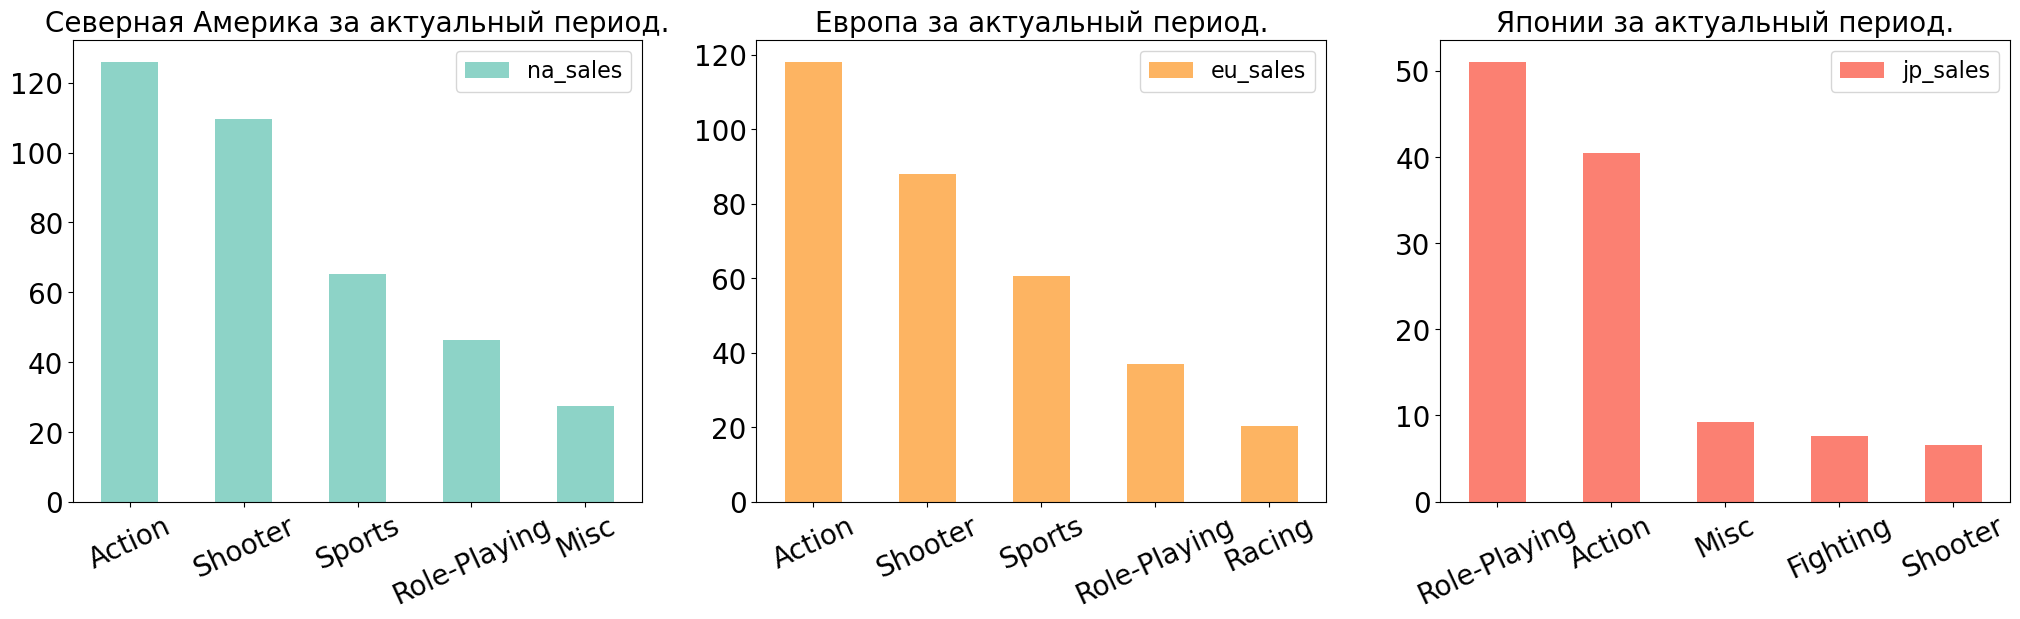

In [37]:
# Самые популярные жанры (топ-5) за актуальный период.
fig, axes = plt.subplots(1, 3, figsize=(25,6))
user_of_each_actual_region_plot('genre', 'na_sales', 0)
user_of_each_actual_region_plot('genre', 'eu_sales', 1)
user_of_each_actual_region_plot('genre', 'jp_sales', 2)
# Сделаем цикл для различия в долях продаж жанров по регионам за актуальный период.
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_games.pivot_table(index='genre', values=column, aggfunc='sum').sort_values(column, ascending=False)
    region['ratio'] = (region[column] / region[column].sum()*100).round(1).astype('str') +'%'
    display(region.nlargest(5, column))


### вывод
Самые популярные жанры игр за актуальный период:
В Северной Америке и Европе популярными жанрами является: Action, Shooter, Sports.
В Японии первая тройка состоит из: Role-Playing, Action и жанр- Misc (разное).


### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

na_sales  ratio
rating                 
M         165.21  37.7%
-1         89.42  20.4%
E          79.05  18.1%
E10+       54.24  12.4%
T          49.79  11.4%

eu_sales  ratio
rating                 
M         145.32  37.0%
E          83.36  21.3%
-1         78.91  20.1%
E10+       42.69  10.9%
T          41.95  10.7%

jp_sales  ratio
rating                 
-1         85.05  60.4%
T          20.59  14.6%
E          15.14  10.8%
M          14.11  10.0%
E10+        5.89   4.2%

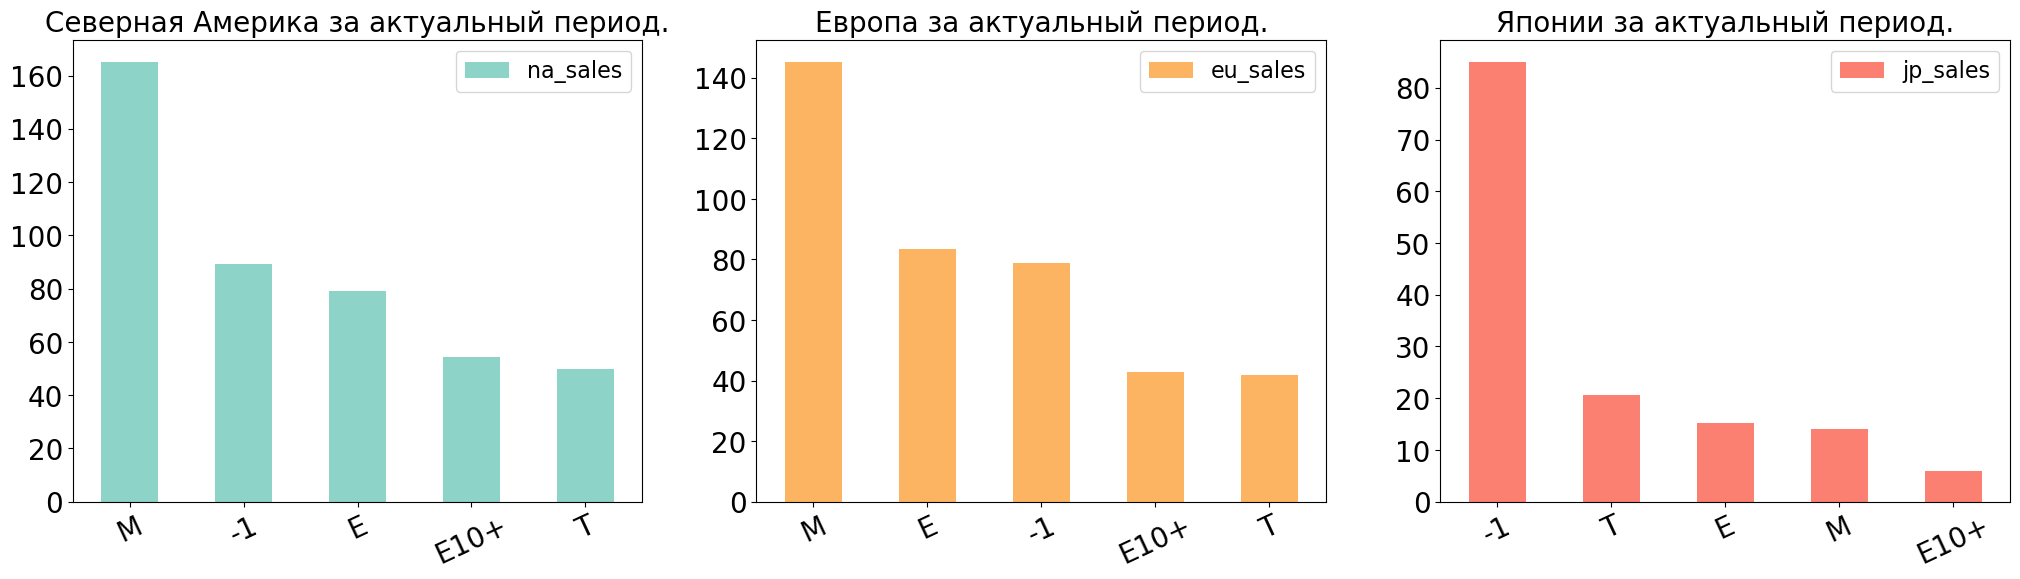

In [38]:
# Посмотрим на продажи игр по рейтингу за актуальный период.
fig, axes = plt.subplots(1, 3, figsize=(25,6))
user_of_each_actual_region_plot('rating', 'na_sales', 0)
user_of_each_actual_region_plot('rating', 'eu_sales', 1)
user_of_each_actual_region_plot('rating', 'jp_sales', 2)
# Сделаем цикл для различия в рейтингах ESRB по регионам за актуальный период.
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_games.pivot_table(index='rating', values=column, aggfunc='sum').sort_values(column, ascending=False)
    region['ratio'] = (region[column] / region[column].sum()*100).round(1).astype('str') +'%'
    display(region.nlargest(5, column))

### вывод
Судя по данным и графикам, для всех регионов топ-5 рейтингов одинаковый.
В 3-ку входят:
В Северной Америке это- M (Mature) — От 17 лет, маркер -1 которым мы ранее заменили пропуски, E (Everyone) — Для всех.
В Европе это- M (Mature) — От 17 лет, E (Everyone) — Для всех и маркер -1 которым мы ранее заменили пропуски.
В Японии тройка рейтингов это- маркер -1 которым мы ранее заменили пропуски, T (Teen) — Подросткам 13—19 лет, E (Everyone) — Для всех.
Рейтинг слабо влияет на продажи платформ в регионах, он везде почти одинаковой.

## Шаг пять. Проверка гипотез.

### Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
Сделаем выборку игр, для которых известно значение 'user_score';
Сформулируем нулевую гипотезу о равенстве средних двух генеральных совокупностей.
Нулевая гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются
Уровень значимости примем за 5%.
Поскольку перед нами стоит задача проверки гипотезы о равенстве средних значений в двух выборках, то применим t-критерий Стьюдента.


In [39]:
# Из данных за актуальный период сделаем выборку, где присутствует значение 'user_score'
sample_with_user_score = actual_games.dropna(subset = ['user_score'])

# Критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = 0.05

results = st.ttest_ind(
    sample_with_user_score.query('platform == "XOne"')['user_score'], 
    sample_with_user_score.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.20111399900783597
Не получилось отвергнуть нулевую гипотезу


Вывод:
Поскольку фактический уровень значимости получился больше принятого критического значения 5%, мы не можем отвергнуть нулевую гипотезу. Таким образом, в данных за исследуемый период достоверных различий между средними пользовательским рейтингами на платформах Xbox One и PC не выявлено.


### Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные".
Используем выборку игр, для которых известно значение 'user_score';
Сформулируем нулевую гипотезу о равенстве средних двух генеральных совокупностей.
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.
Уровень значимости примем за 5%.
Поскольку перед нами стоит задача проверки гипотезы о равенстве средних значений в двух выборках (нулевая гипотеза), то применим t-критерий Стьюдента.


In [40]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = 0.05

results = st.ttest_ind(
    sample_with_user_score.query('genre == "Action"')['user_score'], 
    sample_with_user_score.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.02193663336455412
Отвергаем нулевую гипотезу


Вывод: Поскольку фактический уровень значимости получился меньше принятого критического значения 5%, нулевая гипотеза отвергается. Это говорит о том, что в генеральной совокупности компьютерных игр средние пользовательские рейтинги жанров Action и Sports различаются с высокой степенью достоверности.


## Общий вывод.
В данном проекте изучены исторические данные (до 2016 года) о продажах игр, оценках пользователей и экспертов, жанров и платформ.

Были выявлены определяющие успешность игры закономерности. Отработан принцип работы с данными.

Данные подготовили к анализу:

* Значения в столбце с годом релиза переведены в Int.
* Значения в user_score приведены к float64.

Изучили нулевые значения в датасете:

* Пропуски, кроме столбца возрастного рейтинга не заполняли.
* Пропуски по годам выпуска, названию и жанру удалили -- их очень мало.
* Пропуски в рейтингах критиков и игроков заполнять нельзя, т.к. любой метод заполнения исказит результаты корреляции и статистических тестов.
* В столбце рейтинга пользователей значения tbd заменили на None.

Посчитали суммарные продажи во всех регионах и записали в отдельный столбец 'total_sales'.

Провели исследовательский анализ данных:

Изучили, сколько игр выпускалось в разные годы.

Посмотрели, что медианное время жизни платформы - 6 лет. Среднее - 7-10 лет.

Изучили изменение прибыли от выпущенных игр по годам в разбивке по платформам.

Жизненный цикл для каждой платформы состоит из: начала продаж, пика продаж, спада продаж.

Просматривается сменяемость популярных платформ, каждая была на пике популярности в разные годы, одна за другой, и у каждой платформы свое время жизни, в среднем это от 7 до 10 лет.

Из всей наблюдаемой на графиках динамики, учитывая, что 2016 год был неполный, видно, что все графики идут в убыток, даже те, которые начинали расти. Для 2016 года мы не можем сделать какой-то вывод, тк данные по нему неполные.

Можно сказать, что если  в 2017 году на две платформы (PS4 и XOne) сделать упор, то мы не прогадаем. И не забываем про стабильные (PS и DS), которые продаются всё время.

Выбран актуальный период - это данные начиная с 2013 года. Для прогноза на 2017 год едва ли будут полезны данные за 1990, когда рынок был совершенно другой. В 2012 году еще были активные продажи у PS3, 3DS, X360, но в 2015-2016 годах продажи по этим платформам конкретно падают. Поэтому актуальным периодом будем считать данные начиная с 2013 года. И таким образом подсветим для заказчика платформы PS4 и XOne, которые активно растут.

Изучены платформы с наибольшими суммарными продажами - это: PS, PS2, PS3, PS4, DS, Wii, X360.

Рассмотрена зависимость отзывов пользователей и критиков на продажи внутри платформы PS3. Посчитана корреляция между отзывами и продажами.

Между оценкой пользователей и продажами линейной зависимости нет, коэффициент корреляции - 0.001. Зато заметна довольно хорошая корреляция между оценкой пользователей и оценкой критиков (почти 0.6) - чем выше оценка критиков, тем выше оценка пользователей.

Изучены и другие платформы. Для остальных платформ коэффициент корреляции между оценкой критиков и суммарными продажами чуть-чуть ниже - 31%. Он низкий, чтобы можно было сделать вывод о линейной зависимости. 

Зависимости между оценкой пользователей и суммарными продажами нет, коэффициент корреляции очень маленький.

Изучено общее распределение игр по жанрам. Построены боксплоты на каждый жанр, отражающие число продаж. Судя по графику и сводной таблице, хорошо продаются игры жанров:  Action, Shooter, Sports, Platform и Role-Playing. Выделяются жанры с низкими продажами - это Puzzle и Adventure.

Составлен портрет пользователя каждого региона.

Для пользователя каждого региона (NA, EU, JP) определены:

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

Картина для пользователей Европы и Америки схожая. В Европе и Америке большая доля продаж приходится на игры типа M.

Для Японии в целом видим меньшее число продаж. В Японии игры рейтинга M хорошо продаются, также как и игры для всех возрастных категорий. Самая большая доля продаж приходится на игры для подростков.

Сформулированы и проверены следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулированы нулевая и альтернативная гипотезы:

* H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Так как Не получилось отвергнуть нулевую гипотезу, то  в данных за исследуемый период достоверных различий между средними пользовательским рейтингами на платформах Xbox One и PC не выявлено.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

* Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

Так как в результатах мы получили, что нулевая гипотеза отвергается, это говорит о том, что в генеральной совокупности компьютерных игр средние пользовательские рейтинги жанров Action и Sports различаются с высокой степенью достоверности.

Полученные выводы можно использовать для планирования кампании по продаже игр на 2017-й год.

Исходя из вышеприведенных данных, успешная компьютерная игра должна обладать следующими характеристиками:

* игра должна быть разработана для платформ PS4 и XOne если речь идет о продажах в Северной Америке.
* Если продажи планировать на Европейском рынке, то это будут платформы PS4 и PS3.
* На Японском рынке будут продаваться платформы: 3DS и PS3.
* жанр должен быть 'Action, Shooter' для западных регионов, и 'Role-Playing, Action' для Японии.
* Рейтинг ESRB E (Everyone) — для всех, для всех регионов;
* Ориентироваться нужно на оценки критиков, их отзывы имеют значение, так как, оценки пользователей мало влияют на продажи.
